In [1]:
from seagul.envs.classic_control.planar_quadcopter import PlanarQuadCopter
import matplotlib.pyplot as plt
import numpy as np
import gym
%load_ext autoreload
%autoreload 2

/home/sgillen/work/seagul/seagul/envs/__init__.py:56: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")


In [2]:
env = gym.make('planar_quad-v0')

In [3]:
env.reset()

array([0., 0., 0., 0., 0., 0.], dtype=float32)

-5.306411675815452


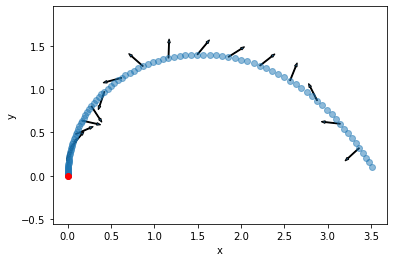

In [4]:
obs = []
rew = []
env.reset()
for i in range(100):
    o,r,_,_ = env.step([50,-3])
    obs.append(o)
    rew.append(r)

obs = np.array(obs)
print(sum(rew))
plt.figure()
env.plot_episode(obs)

In [28]:
from seagul.rl.ars import ARSAgent
from seagul.rl.ars.ars_torch import ARSAgent as ARSTorchAgent
from seagul.rl.ars.ars_torch import ARSModel

from seagul.nn import MLP

policy = MLP(env.observation_space.shape[0], env.action_space.shape[0], 0, 0, input_bias=True)
model = ARSModel(policy, None, None)
env_config = {"xtarg":2, "ytarg":2, "num_steps":250}
torch_agent = ARSTorchAgent('planar_quad-v0',model=model, seed=0, n_workers=24, env_config=env_config)

np_agent = ARSAgent('planar_quad-v0', seed=2,n_workers=24, env_config=env_config)

In [29]:
agent = torch_agent
agent.learn(500);

0 : mean return: -23.018838486765464, top_return: -22.789072671646284, fps:51110.277959117724
10 : mean return: -19.085363091609846, top_return: -18.813026989478153, fps:53338.879692968534
20 : mean return: -18.303671278873296, top_return: -18.078529212609435, fps:53245.76652794922
30 : mean return: -17.030321021799864, top_return: -16.470475386929014, fps:52745.73739429684
40 : mean return: -15.244180080254136, top_return: -15.06866026998101, fps:52914.37270708938
50 : mean return: -14.682770037448698, top_return: -14.518698962438506, fps:53461.530400422125
60 : mean return: -14.260651732750588, top_return: -14.12257593154262, fps:53661.393592391214
70 : mean return: -13.92675578121106, top_return: -13.813069480235677, fps:51805.259971643594
80 : mean return: -12.73321887258938, top_return: -12.344919575260981, fps:52025.789592108566
90 : mean return: -10.917925394899598, top_return: -10.2916005459018, fps:53280.54577660813
100 : mean return: -9.643744013224321, top_return: -9.4068191

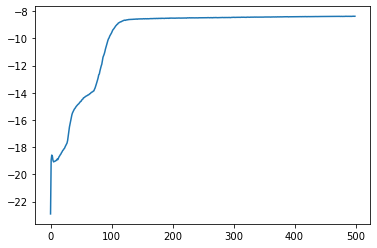

In [30]:
plt.plot(agent.raw_rew_hist)

In [31]:
def do_rollout(env, policy):
    state_list = []
    act_list = []
    reward_list = []

    obs = env.reset()
    done = False
    while not done:
        state_list.append(np.copy(obs))

        actions,_,_,_ = policy.step(obs)
        obs, reward, done, _ = env.step(actions)

        act_list.append(np.array(actions))
        reward_list.append(reward)


    state_arr = np.stack(state_list)
    act_arr = np.stack(act_list)
    reward_arr = np.array(reward_list)
    

    return state_arr, act_arr, reward_arr


In [32]:
o,a,r = do_rollout(env, agent.model)

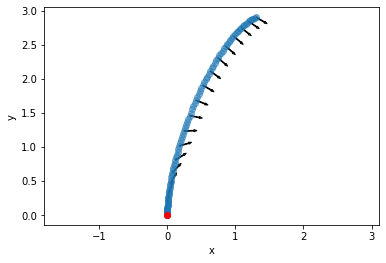

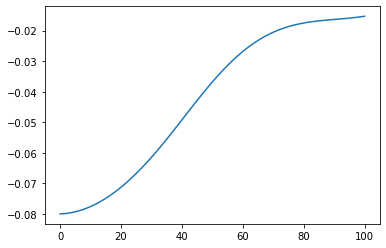

In [33]:
env.plot_episode(o)
plt.figure()
plt.plot(r)

In [34]:
from seagul.rl.sac import SACAgent, SACModel
from seagul.nn import MLP
env_name = 'planar_quad-v0'

input_size = env.observation_space.shape[0]
output_size = env.action_space.shape[0]
layer_size = 64
num_layers = 2

model = SACModel(
     policy = MLP(input_size, output_size*2, num_layers, layer_size),
     value_fn= MLP(input_size, 1, num_layers, layer_size),
     q1_fn = MLP(input_size+output_size, 1, num_layers, layer_size),
     q2_fn = MLP(input_size+output_size, 1, num_layers, layer_size),
)

agent = SACAgent(env_name=env_name, model=model, seed=int(0), exploration_steps=5000,
     min_steps_per_update=1, reward_stop=3000, gamma=1, sgd_batch_size=64,
     replay_batch_size=256, iters_per_update=1, env_max_steps=250,
     polyak=.995)


AttributeError: 'PlanarQuadCopter' object has no attribute 'L'

In [ ]:
agent.learn(2e6);

In [ ]:
plt.plot(agent.raw_rew_hist)

In [ ]:
A = np.identity(5)
x = np.ones((5,1))*5

In [ ]:
x**2